# Background:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

# Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

# Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

# Download Data:

https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7

# Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

# Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

# Current Challenges:

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

In [91]:
#Import the needed libraries
import pandas as pd
import numpy as np

In [93]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Preparation

In [96]:
#Load the CSV data

term_deposit = pd.read_csv('term-deposit-marketing-2020.csv')

#Look at the first five rows of the data

print(term_deposit.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no  


In [147]:
#Examine if there are any missing values in the data

print(term_deposit.isnull().sum())

#upon the examination, there are no missing values in the data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


In [149]:
#Check the class imbalance
print("Class distribution:\n", term_deposit['y'].value_counts(normalize=True))

Class distribution:
 y
no     0.9276
yes    0.0724
Name: proportion, dtype: float64


# Data Exploration 
Here is the description of the data
* age : age of customer (numeric)

* job : type of job (categorical)

* marital : marital status (categorical)

* education (categorical)

* default: has credit in default? (binary)

* balance: average yearly balance, in euros (numeric)

* housing: has a housing loan? (binary)

* loan: has personal loan? (binary)

* contact: contact communication type (categorical)

* day: last contact day of the month (numeric)

* month: last contact month of year (categorical)

* duration: last contact duration, in seconds (numeric)

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

* y - has the client subscribed to a term deposit? (binary)

In [104]:
#Do quick summary stats for the numeric attributes/variables

term_deposit.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


# Categorical Attributes

In [18]:
#Display the unique values in the "job" column
unique_jobs = term_deposit['job'].unique()
print(unique_jobs)

# there are 11 unique values + unknown 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [151]:
#Count the unique value in the "job" column
job_counts = term_deposit['job'].value_counts()
print(job_counts)

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64


In [159]:
#Count of yes and no by the type of job
yes_no_job = term_deposit.groupby('y')['job'].value_counts().unstack().fillna(0)
yes_no_job

job,admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,4132,8848,1317,1034,7490,1286,1302,3672,442,6355,1008,218
yes,351,535,88,53,676,151,112,238,82,497,96,17


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

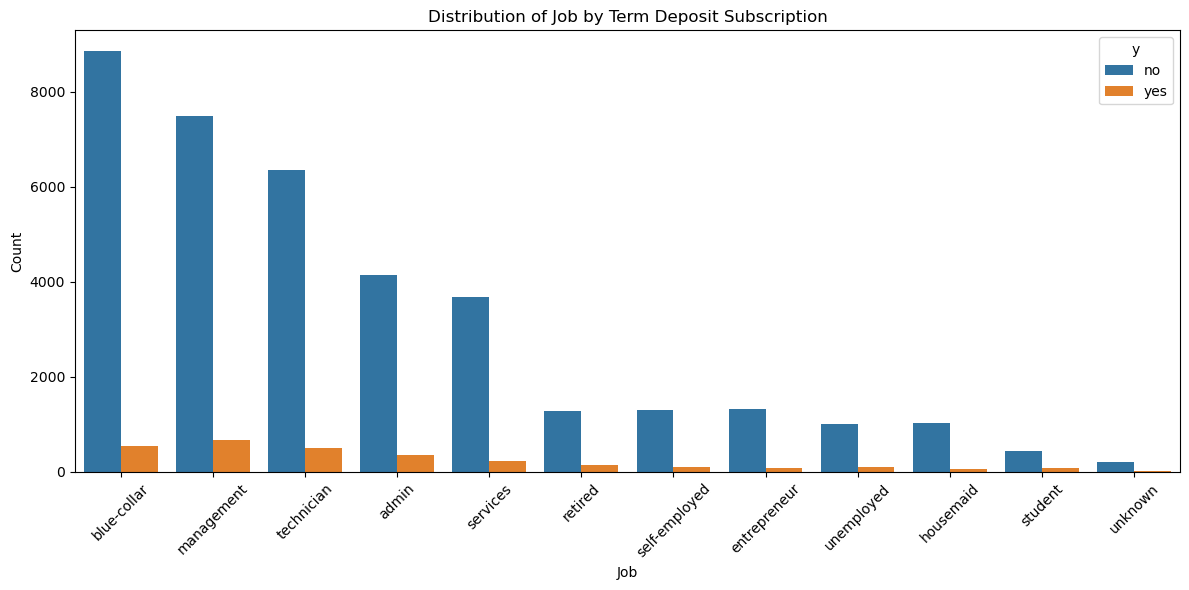

In [21]:
#Create a count plot to visualize the distribution of the column "job" by "y"
plt.figure(figsize=(12, 6))
sns.countplot(data=term_deposit, x='job', hue='y', order=term_deposit['job'].value_counts().index)

#Add labels and title
plt.title('Distribution of Job by Term Deposit Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

#Show the plot
plt.tight_layout()
plt.show()

In [23]:
#Get the unique values in the column "marital"
unique_marital = term_deposit['marital'].unique()
print(unique_marital)

['married' 'single' 'divorced']


In [161]:
#Count of yes and no by "marital"
yes_no_marital = term_deposit.groupby('y')['marital'].value_counts().unstack().fillna(0)
yes_no_marital

marital,divorced,married,single
y,,,
no,4334,22908,9862
yes,391,1478,1027


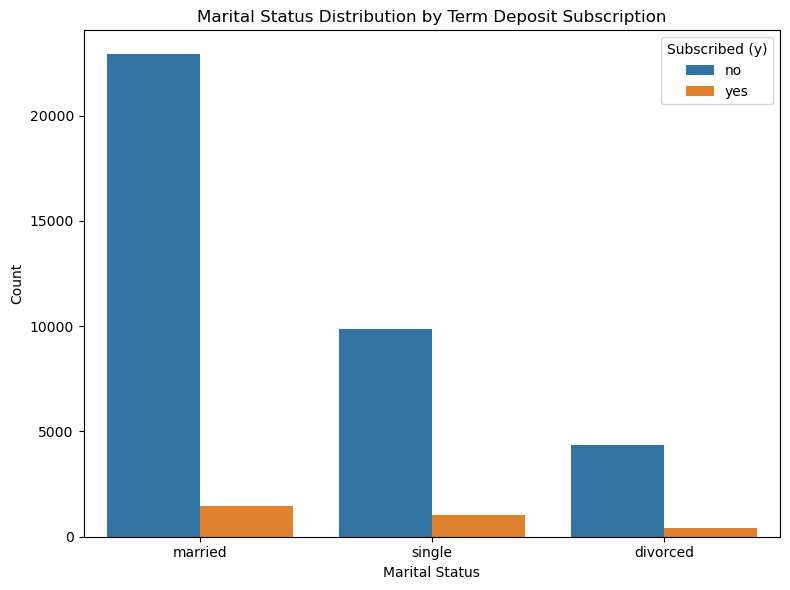

In [26]:
#Create the count plot to visualize "marital" distribution by "y"
plt.figure(figsize=(8, 6))
sns.countplot(data=term_deposit, x='marital', hue='y', order=term_deposit['marital'].value_counts().index)

#Add labels and title
plt.title('Marital Status Distribution by Term Deposit Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', loc='upper right')

#Show the plot
plt.tight_layout()
plt.show()

In [28]:
#Get the unique values in the column "education"
unique_education = term_deposit['education'].unique()
print(unique_education)

['tertiary' 'secondary' 'unknown' 'primary']


In [163]:
#Count of yes and no by the column "education"
yes_no_education = term_deposit.groupby('y')['education'].value_counts().unstack().fillna(0)
yes_no_education

education,primary,secondary,tertiary,unknown
y,,,,
no,5917,19575,10177,1435
yes,353,1418,1029,96


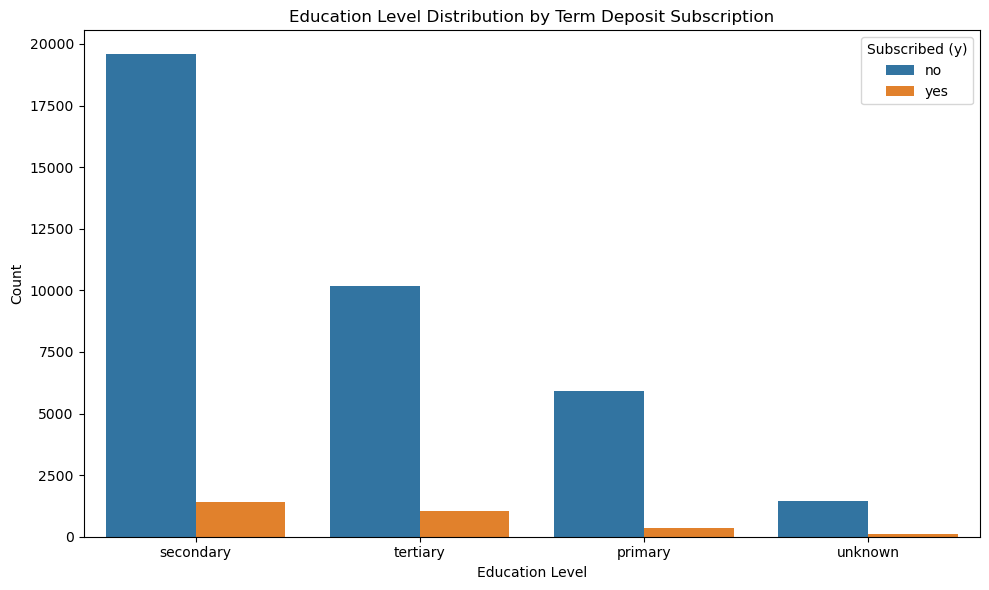

In [30]:
#Create the count plot to visualize "education" distribution by "y"
plt.figure(figsize=(10, 6))
sns.countplot(data=term_deposit, x='education', hue='y', order=term_deposit['education'].value_counts().index)

#Add labels and title
plt.title('Education Level Distribution by Term Deposit Subscription')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', loc='upper right')

#Show the plot
plt.tight_layout()
plt.show()

In [32]:
#Get the unique values in the column "contact"
unique_contact = term_deposit['contact'].unique()
print(unique_contact)

['unknown' 'cellular' 'telephone']


In [165]:
#Count of yes and no by the column "contact"
yes_no_contact = term_deposit.groupby('y')['contact'].value_counts().unstack().fillna(0)
yes_no_contact

contact,cellular,telephone,unknown
y,,,
no,22681,2155,12268
yes,2233,166,497


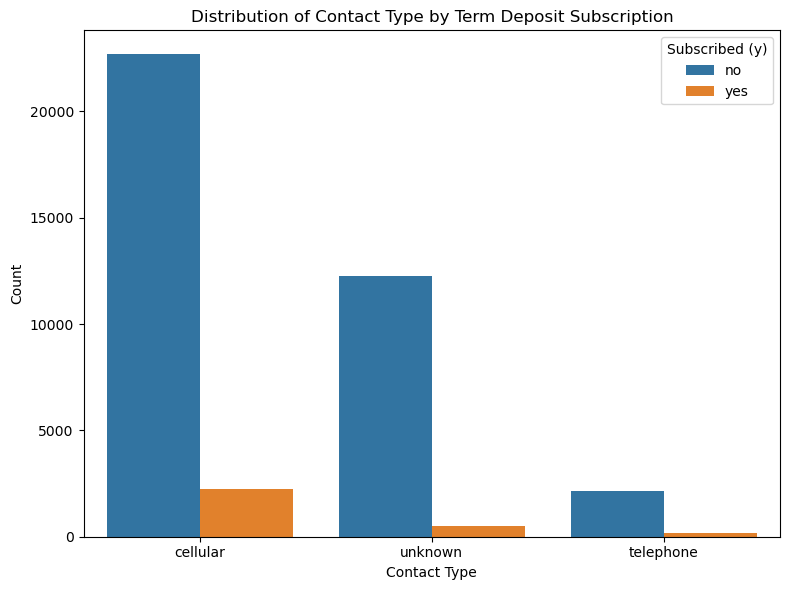

In [34]:
#Create the count plot for "contact" by "y"
plt.figure(figsize=(8, 6))
sns.countplot(data=term_deposit, x='contact', hue='y', order=term_deposit['contact'].value_counts().index)

#Add labels and title
plt.title('Distribution of Contact Type by Term Deposit Subscription')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', loc='upper right')

#Show the plot
plt.tight_layout()
plt.show()

In [36]:
#Get the unique values in the column "month"
unique_months = term_deposit['month'].unique()
print(unique_months)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']


In [167]:
#Count of yes and no by the column "month"
yes_no_month = term_deposit.groupby('y')['month'].value_counts().unstack().fillna(0)
yes_no_month

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct
y,,,,,,,,,,,
no,2267,4927,12,2041,1138,5996,4440,133,12741,3378,31
yes,451,288,1,255,38,384,294,125,791,220,49


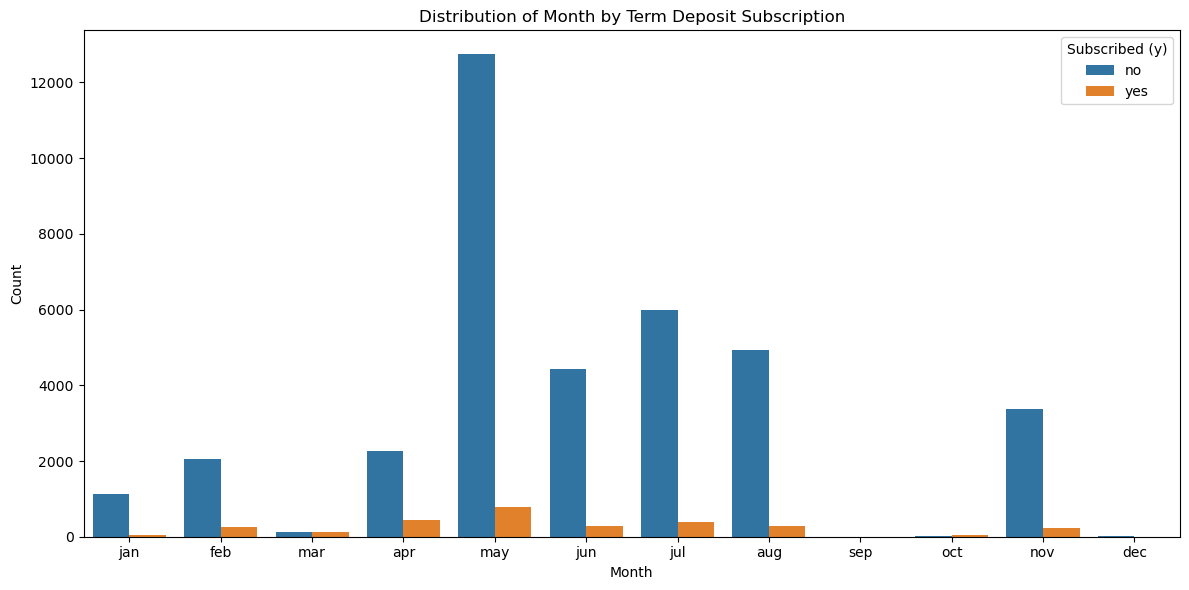

In [38]:
#Define the order to ensure months are ordered chronologically, 
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#Create the count plot for "month" by "y"
plt.figure(figsize=(12, 6))
sns.countplot(data=term_deposit, x='month', hue='y', order=month_order)

#Add labels and title
plt.title('Distribution of Month by Term Deposit Subscription')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', loc='upper right')

#Show the plot
plt.tight_layout()
plt.show()

# Numeric Attributes

In [41]:
#Get the unique values in the column "age"
unique_ages = term_deposit['age'].unique()
print(unique_ages)

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]


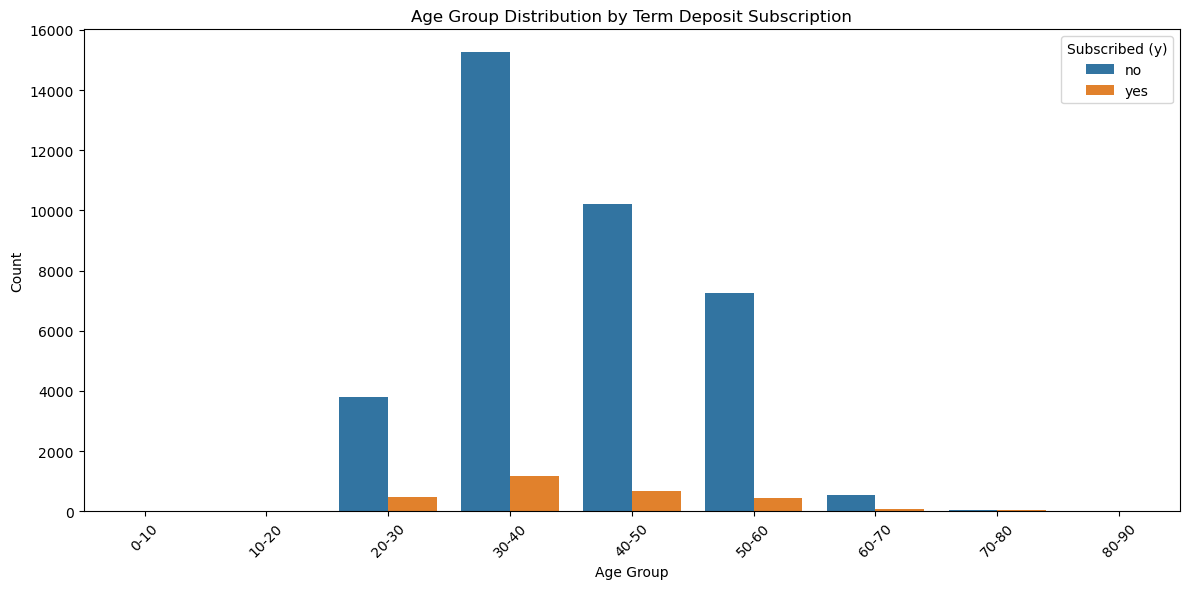

In [43]:
#Define age bins by 10-year intervals
bins = range(0, 100, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]

#Create a new column with binned ages
term_deposit['age_group'] = pd.cut(term_deposit['age'], bins=bins, labels=labels, right=False)

#Plot the distribution by age group and y
plt.figure(figsize=(12, 6))
sns.countplot(data=term_deposit, x='age_group', hue='y', order=labels)

#Add labels and title
plt.title('Age Group Distribution by Term Deposit Subscription')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)')
plt.xticks(rotation=45)

#Show the plot
plt.tight_layout()
plt.show()

In [47]:
#Get the unique values in the column "day"
unique_days = term_deposit['day'].unique()
print(unique_days)

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


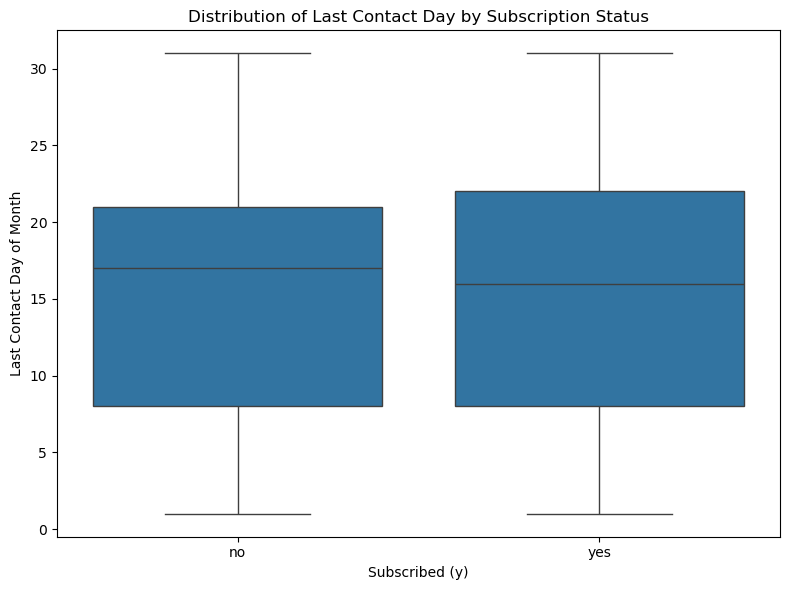

In [49]:
#Plot boxplot of the column "day" grouped by "y"
plt.figure(figsize=(8, 6))
sns.boxplot(data=term_deposit, x='y', y='day')

# Add labels and title
plt.title('Distribution of Last Contact Day by Subscription Status')
plt.xlabel('Subscribed (y)')
plt.ylabel('Last Contact Day of Month')

#Show the plot
plt.tight_layout()
plt.show()

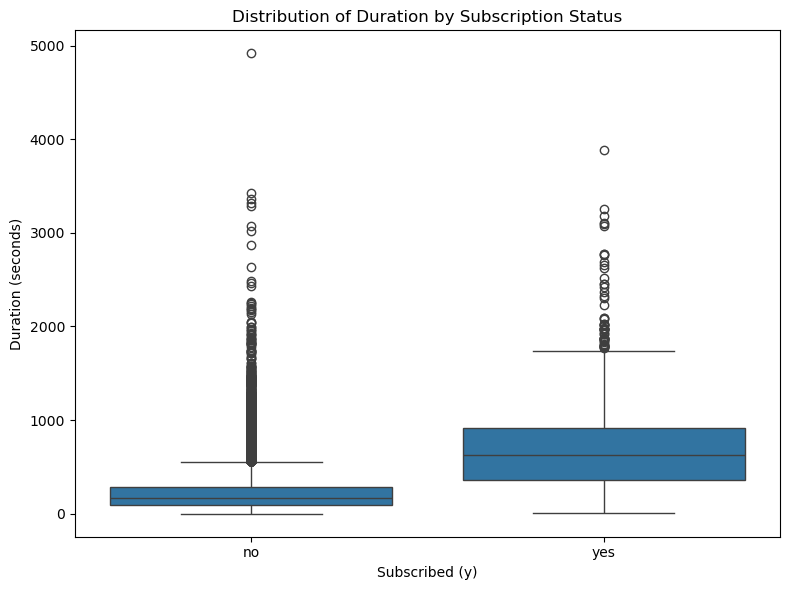

In [53]:
#Plot boxplot of the column "duration" grouped by "y"
plt.figure(figsize=(8, 6))
sns.boxplot(data=term_deposit, x='y', y='duration')

# Add labels and title
plt.title('Distribution of Duration by Subscription Status')
plt.xlabel('Subscribed (y)')
plt.ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

In [55]:
#Get the  unique values in the column "campaign" 
unique_campaigns = term_deposit['campaign'].unique()
print(unique_campaigns)

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


# Binary Attributes

In [58]:
#Get the unique values in the column "default"
unique_defaults = term_deposit['default'].unique()
print(unique_defaults)

['no' 'yes']


In [169]:
#Count of yes and no by the column "default"
yes_no_default = term_deposit.groupby('y')['default'].value_counts().unstack().fillna(0)
yes_no_default

default,no,yes
y,,
no,36344,760
yes,2847,49


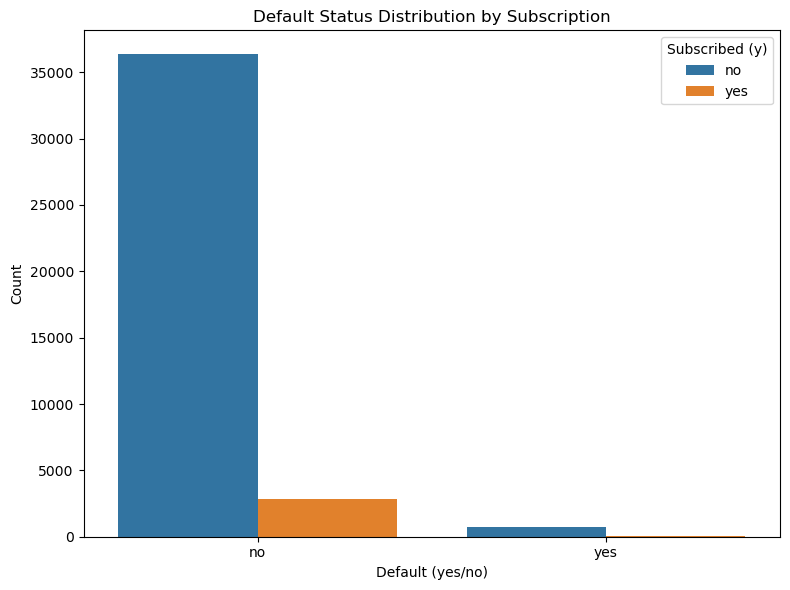

In [60]:
#Create count plot for "default" by "y"
plt.figure(figsize=(8, 6))
sns.countplot(data=term_deposit, x='default', hue='y', order=term_deposit['default'].value_counts().index)

#Add labels and title
plt.title('Default Status Distribution by Subscription')
plt.xlabel('Default (yes/no)')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', loc='upper right')

#Show the plot
plt.tight_layout()
plt.show()

In [62]:
#Get the unique values in the column "housing"
unique_housing = term_deposit['housing'].unique()
print(unique_housing)

['yes' 'no']


In [171]:
#Count of yes and no by the column "housing"
yes_no_housing = term_deposit.groupby('y')['housing'].value_counts().unstack().fillna(0)
yes_no_housing

housing,no,yes
y,,
no,14537,22567
yes,1432,1464


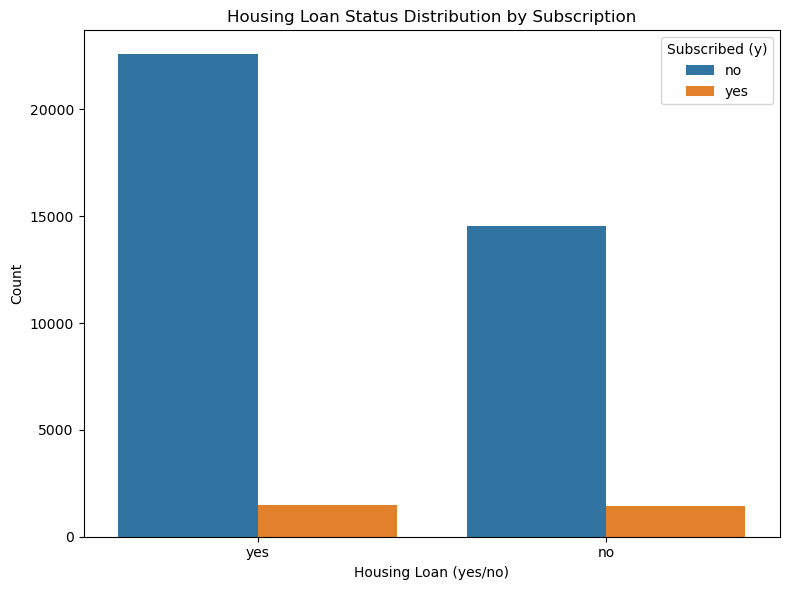

In [64]:
#Create count plot for "housing" by "y"
plt.figure(figsize=(8, 6))
sns.countplot(data=term_deposit, x='housing', hue='y', order=term_deposit['housing'].value_counts().index)

# Add labels and title
plt.title('Housing Loan Status Distribution by Subscription')
plt.xlabel('Housing Loan (yes/no)')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [66]:
#Get the unique values in the column "loan" 
unique_loans = term_deposit['loan'].unique()
print(unique_loans)

['no' 'yes']


In [173]:
#Count of yes and no by the column "loan"
yes_no_loan = term_deposit.groupby('y')['loan'].value_counts().unstack().fillna(0)
yes_no_loan

loan,no,yes
y,,
no,30554,6550
yes,2516,380


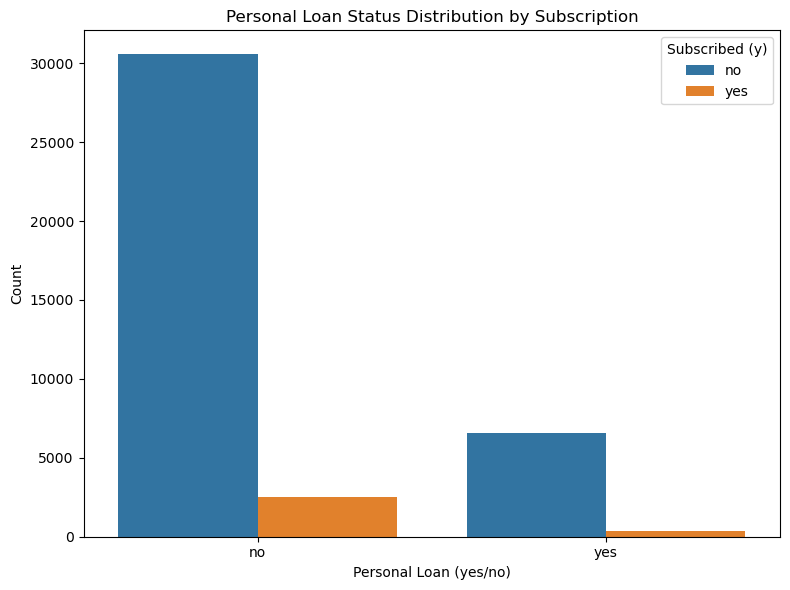

In [68]:
#Create count plot for "loan" by "y"
plt.figure(figsize=(8, 6))
sns.countplot(data=term_deposit, x='loan', hue='y', order=term_deposit['loan'].value_counts().index)

#Add labels and title
plt.title('Personal Loan Status Distribution by Subscription')
plt.xlabel('Personal Loan (yes/no)')
plt.ylabel('Count')
plt.legend(title='Subscribed (y)', loc='upper right')

#Show the plot
plt.tight_layout()
plt.show()

In [70]:
#Count of each value in the column "y" 
y_counts = term_deposit['y'].value_counts()
print(y_counts)

y
no     37104
yes     2896
Name: count, dtype: int64


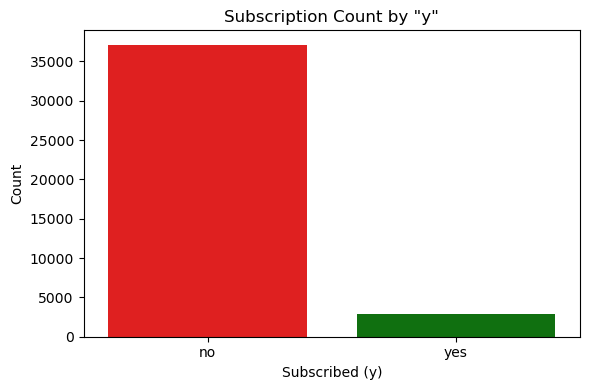

In [72]:
#Plot the count of the column "y"
plt.figure(figsize=(6, 4))
sns.countplot(data=term_deposit, x='y', hue='y', palette={'yes': 'green', 'no': 'red'})

#Add labels and title
plt.title('Subscription Count by "y"')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')

#Show the plot
plt.tight_layout()
plt.show()

# Data Preprocessing

In [106]:
#Define feature and target
X = term_deposit.drop('y', axis=1)
y = term_deposit['y'].apply(lambda x: 1 if x=='yes' else 0)

In [108]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1


In [110]:
y

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int64

In [112]:
#Define the categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'contact', 'month']
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign']


In [114]:
#Create the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [116]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [118]:
#Combine then into the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [122]:
#Address the Class Imbalance by using the technique class weights with the Random Forest Model

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Build and Evaluate Model with Cross-Validation

In [124]:
#Define the Random Forest classifier with class weight
clf = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

In [126]:
#Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', clf)])


In [128]:
#Evaluate the model with 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f'Average accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')





Average accuracy: 0.9348 ± 0.0011


In [132]:
#Print out the classification report
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
print(classification_report(y, y_pred, target_names=[str(c) for c in np.unique(y)]))



              precision    recall  f1-score   support

           0       0.94      0.99      0.97     37104
           1       0.63      0.24      0.35      2896

    accuracy                           0.93     40000
   macro avg       0.79      0.62      0.66     40000
weighted avg       0.92      0.93      0.92     40000



# Fit the Model and Analyze Feature Importance

In [135]:
#Fit the model to the entire data
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month'])])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 0.5390254420008624,
                                                      1: 6.906077348066298},
                                        random_state=42))])

In [136]:
#Get the feature importances
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = pipeline.named_steps['classifier'].feature_importances_


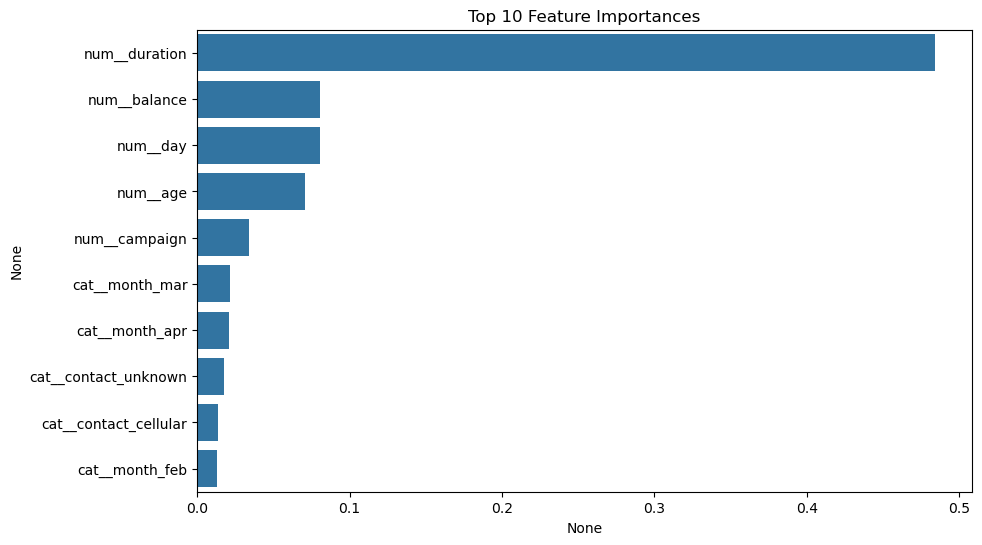

In [137]:
#Plot the feature importances
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Top 10 Feature Importances')
plt.show()

# Customer Segmentation & Prioritization

In [141]:
#Use the predicted probabilities to identify high-probability customers
#Calculate predicted probabilities
probs = pipeline.predict_proba(X)[:,1]

In [143]:
#Create a DataFrame for the analysis
results = X.copy()
results['subscription_prob'] = probs
results['actual'] = y

In [145]:
#Prioritize the top customers
top_customers = results.sort_values(by='subscription_prob', ascending=False).head(100)
print(top_customers)

       age          job   marital  education default  balance housing loan  \
35447   43   management   married   tertiary      no     1429     yes   no   
34018   26        admin    single  secondary      no      255      no   no   
36804   38     services    single  secondary      no      895     yes   no   
37371   38     services    single  secondary      no     2253     yes   no   
20386   34   management   married   tertiary      no      828      no  yes   
...    ...          ...       ...        ...     ...      ...     ...  ...   
35309   44  blue-collar   married    primary      no     4031     yes   no   
39521   32   technician    single   tertiary      no      654     yes   no   
34055   30   management    single   tertiary      no      364      no   no   
38628   36     services    single  secondary      no        0     yes   no   
20023   36   technician  divorced  secondary      no        1      no   no   

        contact  day month  duration  campaign  subscription_pr